In [1]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
import json
import pandas as pd

from utils.config import Config
from utils.visualization import plot_overfitting, plot_test_metrics

/home/dom/Projects/trading-ml/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Check Metrics

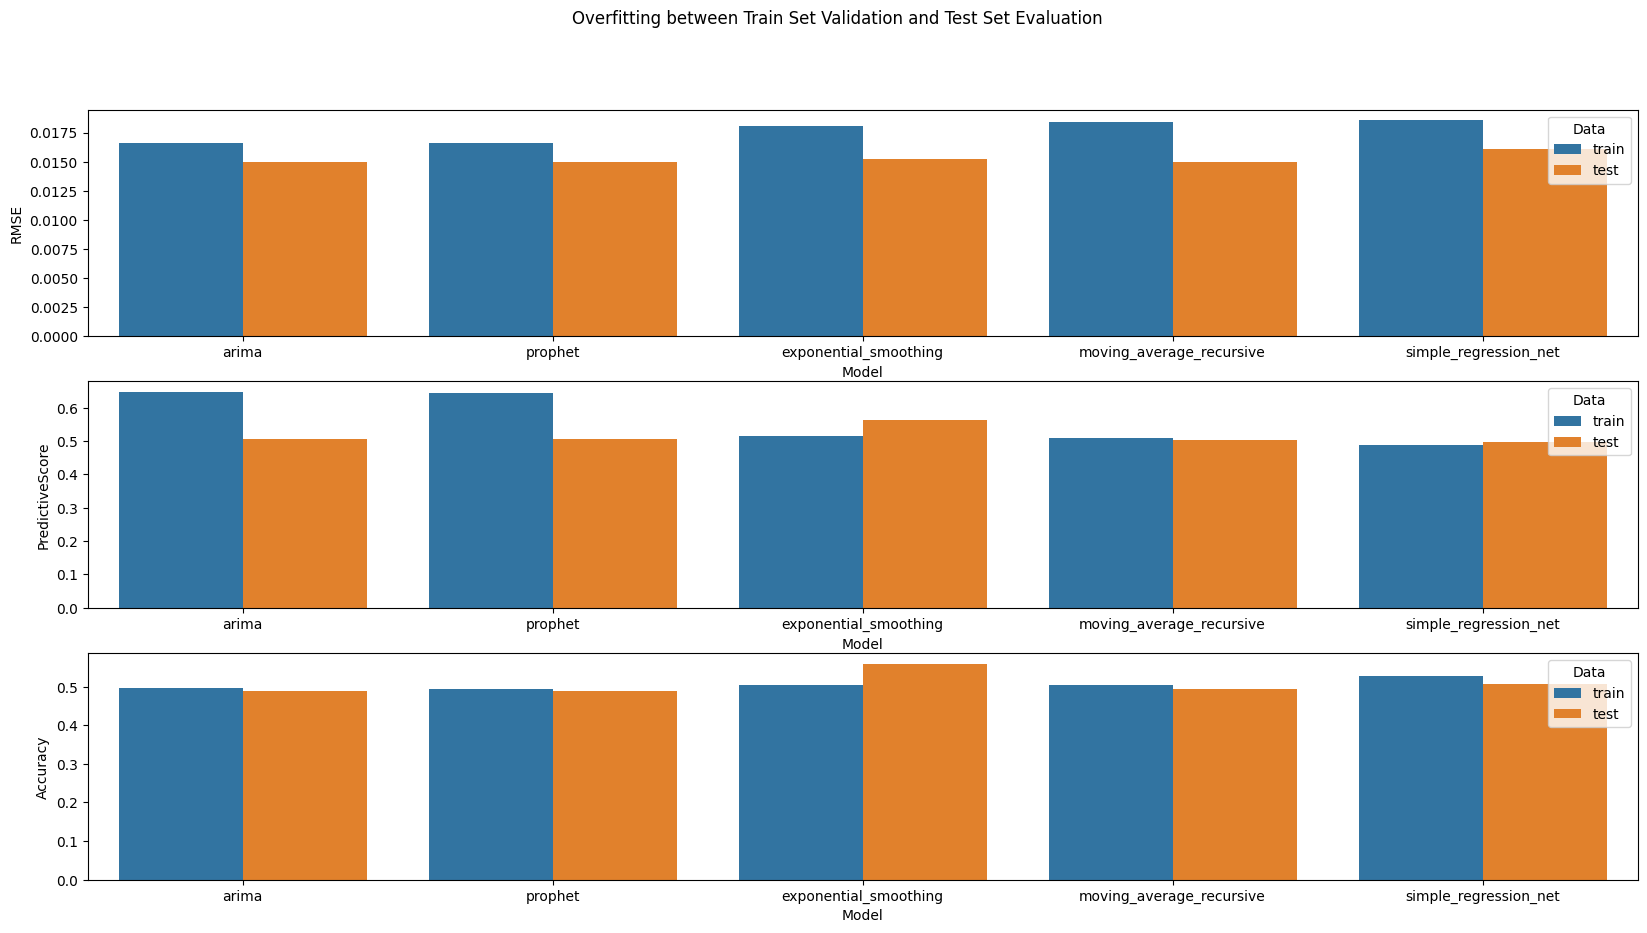

In [2]:
plot_overfitting()

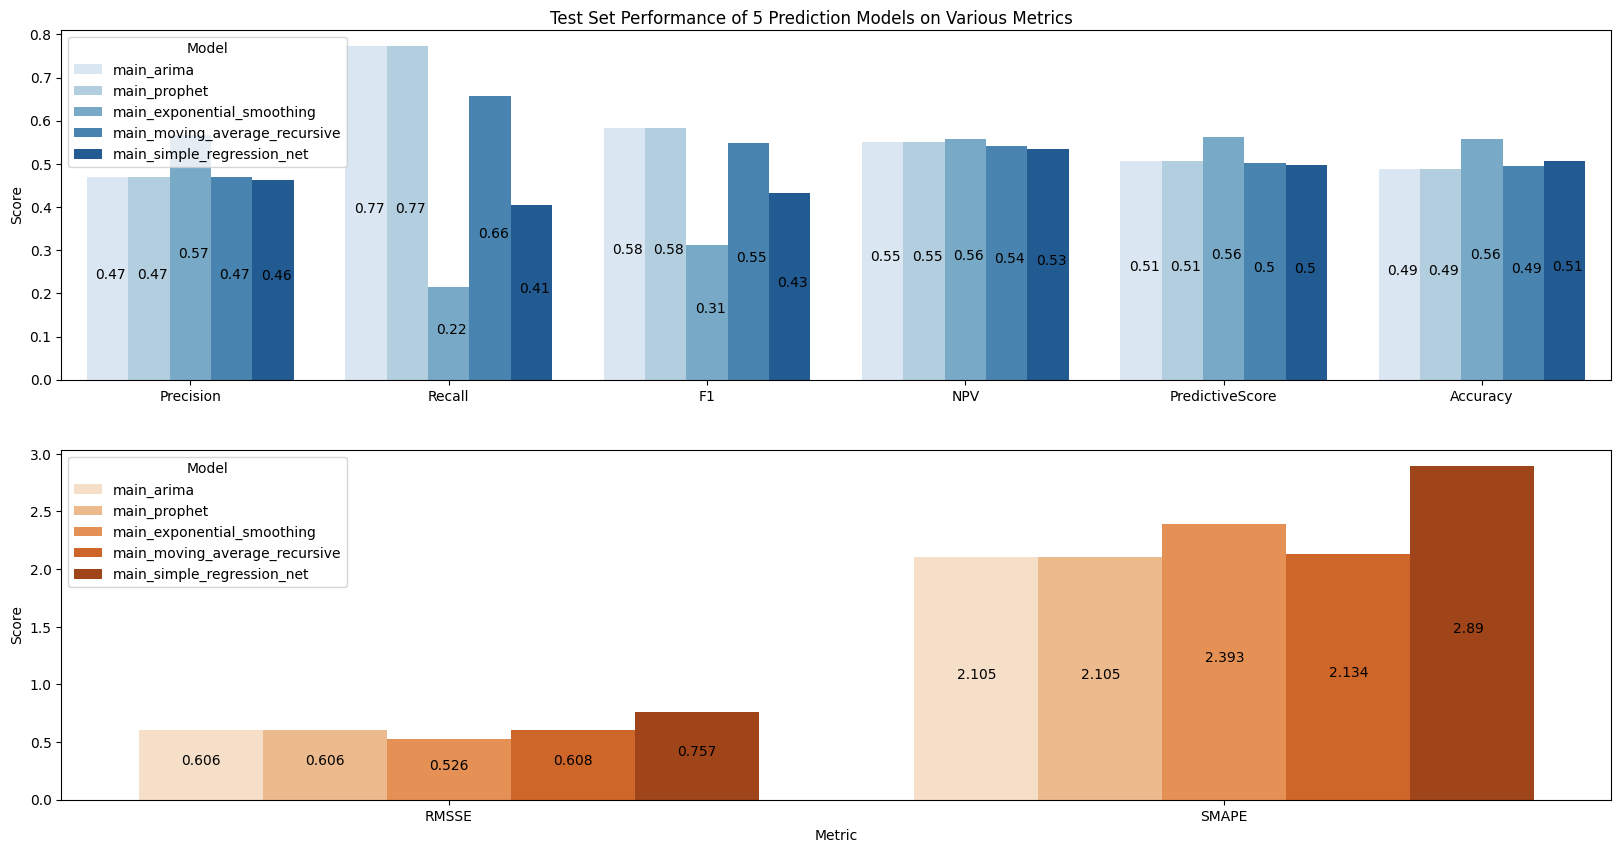

In [3]:
plot_test_metrics()

### Check Recommendation

In [4]:
rec = json.load(open("../results/recommendation.json", "r"))
print("Ratings:", rec["TopModelRatings"], "\n")
for k, v in rec["MedianTopModelTestMetrics"].items():
    print(f"{k}: {round(v, 2)}")

Ratings: {'main_exponential_smoothing': 0.19140263743791744, 'main_simple_regression_net': 0.13869773817683345} 

Precision: 0.52
Recall: 0.31
F1: 0.37
NPV: 0.55
PredictiveScore: 0.53
Accuracy: 0.53
RMSE: 0.02
RMSSE: 0.64
SMAPE: 2.64


In [5]:
long = pd.DataFrame({k: v for k, v in rec["long"].items() if k in ["risk", "reward"]}).transpose()
short = pd.DataFrame({k: v for k, v in rec["short"].items() if k in ["risk", "reward"]}).transpose()
df = pd.concat([
    pd.concat({"long": long}, names=["PositionType"]),
    pd.concat({"short": short}, names=["PositionType"])
])
df

TopStock MedianPredictedReturn ModelAgreement  \
PositionType                                                             
long         risk    AT0000A21KS2               1.01771            1/2   
             reward  AT0000A21KS2               1.01771            1/2   
short        risk    AT0000821103               0.95201            1/2   
             reward  AT0000821103               0.95201            1/2   

                    MarketTrend MACDCrossover      MarketState  \
PositionType                                                     
long         risk       neutral             0  very overbought   
             reward     neutral             0  very overbought   
short        risk       bullish             1       overbought   
             reward     bullish             1       overbought   

                    RelativeStrengthIndex FastStochasticOscillator  \
PositionType                                                         
long         risk                      83                      100   
             reward                    83                      100   
short        risk                      67                      100   
             reward                    67                      100   

                    BollingerBandBreakout  
PositionType                               
long         risk                       1  
             reward                     1  
short        risk                       0  
             reward                     0

### Trade

In [6]:
# Select
position_type = "short"
optimize = "risk"

trade = df.loc[position_type].loc[optimize]
print(trade["TopStock"])
trade["ISINDescription"] = Config().securities[trade["TopStock"]]
trade["PositionType"] = position_type
trade["Optimize"] = optimize
trade["TopModelRatings"] = rec["TopModelRatings"]
trade["MedianTopModelTestMetrics"] = rec["MedianTopModelTestMetrics"]

AT0000821103


In [7]:
# Open
trade["WKN"] = "MA9CXT"
trade["WKN Description"] = "Turbo Open End | Short | UNIQA Insurance Group"
trade["Security Type"] = "knock-out"
trade["Fundamentals"] = "https://www.finanzen.net/fundamentalanalyse/uniqa_insurance"
trade["Git Tag"] = "20231103"
trade["Open Date"] = "2023-11-03"
trade["Open Price"] = 0.83
trade["Shares"] = 100
trade

TopStock                                                          AT0000821103
MedianPredictedReturn                                                  0.95201
ModelAgreement                                                             1/2
MarketTrend                                                            bullish
MACDCrossover                                                                1
MarketState                                                         overbought
RelativeStrengthIndex                                                       67
FastStochasticOscillator                                                   100
BollingerBandBreakout                                                        0
ISINDescription                          uniqa-insurance-group-ag-AT0000821103
PositionType                                                             short
Optimize                                                                  risk
TopModelRatings              {'main_exponential_smoo

In [ ]:
# Close
trade["Close Price"] = 0
trade["Gross Profit"] = 0
trade["Fees"] = 0
trade["Net Profit"] = 0
trade["Reward"] = 0
trade

In [ ]:
# Persist
path = "../results/trades.csv"
trades = pd.read_csv(path, sep=";")
# pd.concat([trades, trade]).to_csv(path, sep=";", index=False)